In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

from IPython.display import Video

In [3]:
def resample(filename, t_min_offset=0, t_max_offset=0):
    # load raw data
    with open(filename, 'r') as f:
        data = json.load(f)

    # convert lists to numpy arrays
    for val in data.values():
        for key in val.keys():
            val[key] = np.array(val[key])

    # create an array of times at which to subsample
    t_min = -np.inf
    t_max = np.inf
    for key, val in data.items():
        t_min = max(t_min, val['time'][0])
        t_max = min(t_max, val['time'][-1])
    t_min += t_min_offset * 1000
    t_max -= t_max_offset * 1000
    nt = int(1 + np.floor((t_max - t_min) / 10.))
    t = np.arange(0, 10 * nt, 10) / 1000.
    resampled_data = {'time': t}

    # resample raw data with linear interpolation
    for k, v in data.items():
        f = interp1d((v['time'] - t_min) / 1000., v['data'])
        resampled_data[k] = f(t)
        
    # return the resampled data
    return resampled_data

In [5]:
g = 9.81
m = 0.04275
r = 0.029

In [8]:
data = resample('x_data.json',
                t_min_offset=5.,
                t_max_offset=5.)

In [9]:
t = data['time']
w_x = np.deg2rad(data['gyro.x'])
w_y = np.deg2rad(data['gyro.y'])
w_z = np.deg2rad(data['gyro.z'])

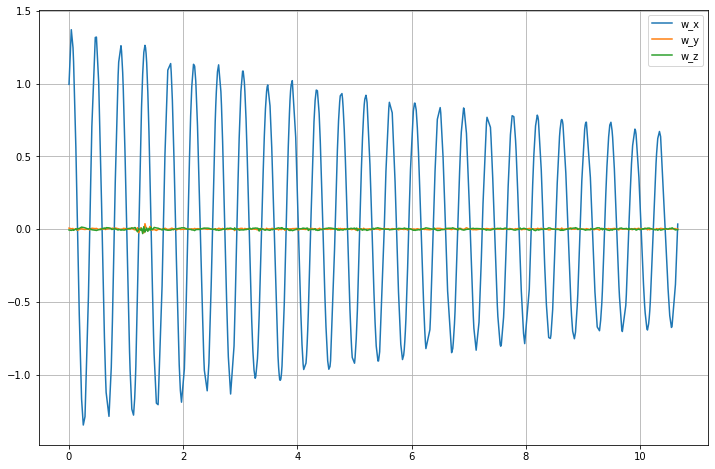

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(t, w_x, label='w_x')
plt.plot(t, w_y, label='w_y')
plt.plot(t, w_z, label='w_z')
plt.legend()
plt.grid()

In [11]:
# Find the index of each peak (increase "prominence" if you get bad results)
peaks = find_peaks(w_x, prominence=0)
i_peaks = peaks[0]

# Find the time at each peak
t_peaks = t[i_peaks]

# Find w_x at each peak (for visualization)
w_x_peaks = w_x[i_peaks]

# Find the difference between consecutive peak times
#
# Note:
#
#  t_peaks[1:] means t_peaks without the first element
#  t_peaks[:-1] means t_peaks without the last element
#
# So, t_peaks[1:] - t_peaks[:-1] produces the following array:
#
#  [t_peaks[1]-t_peaks[0], t_peaks[0]-t_peaks[1], ...]
#
t_diff = t_peaks[1:] - t_peaks[:-1]

# Find the mean difference as an estimate of the oscillation period
T = np.mean(t_diff)

In [12]:
print(t_peaks)

[ 0.04  0.48  0.91  1.33  1.78  2.18  2.62  3.05  3.48  3.91  4.33  4.78
  5.2   5.61  6.05  6.5   6.91  7.32  7.76  8.2   8.63  9.06  9.49  9.91
 10.34]


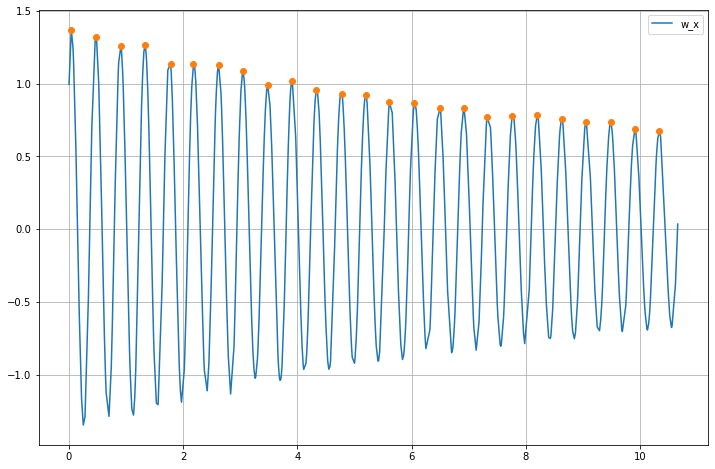

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(t, w_x, label='w_x')
plt.plot(t_peaks, w_x_peaks, '.', markersize=12)
plt.legend()
plt.grid()

In [14]:
print(f'time differences: {t_diff}\n')
print(f'period estimate (i.e., mean time difference): T = {T:.4f}')

time differences: [0.44 0.43 0.42 0.45 0.4  0.44 0.43 0.43 0.43 0.42 0.45 0.42 0.41 0.44
 0.45 0.41 0.41 0.44 0.44 0.43 0.43 0.43 0.42 0.43]

period estimate (i.e., mean time difference): T = 0.4292


In [15]:
J_x = 0.00002079685

## Y-AXIS

In [16]:
r = 0.029

In [17]:
data = resample('y_data.json',
                t_min_offset=5.,
                t_max_offset=5.)

In [18]:
t = data['time']
w_x = np.deg2rad(data['gyro.x'])
w_y = np.deg2rad(data['gyro.y'])
w_z = np.deg2rad(data['gyro.z'])

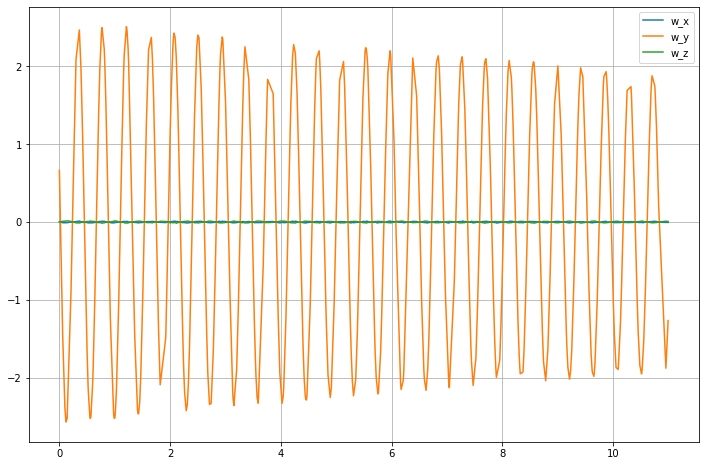

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(t, w_x, label='w_x')
plt.plot(t, w_y, label='w_y')
plt.plot(t, w_z, label='w_z')
plt.legend()
plt.grid()

In [20]:
# Find the index of each peak (increase "prominence" if you get bad results)
peaks = find_peaks(w_y, prominence=0)
i_peaks = peaks[0]

# Find the time at each peak
t_peaks = t[i_peaks]

# Find w_x at each peak (for visualization)
w_y_peaks = w_y[i_peaks]

# Find the difference between consecutive peak times
#
# Note:
#
#  t_peaks[1:] means t_peaks without the first element
#  t_peaks[:-1] means t_peaks without the last element
#
# So, t_peaks[1:] - t_peaks[:-1] produces the following array:
#
#  [t_peaks[1]-t_peaks[0], t_peaks[0]-t_peaks[1], ...]
#
t_diff = t_peaks[1:] - t_peaks[:-1]

# Find the mean difference as an estimate of the oscillation period
T = np.mean(t_diff)

In [21]:
print(t_peaks)

[ 0.36  0.77  1.21  1.66  2.07  2.5   2.94  3.35  3.76  4.23  4.69  5.13
  5.53  5.97  6.38  6.84  7.27  7.7   8.12  8.56  9.    9.41  9.87 10.32
 10.7 ]


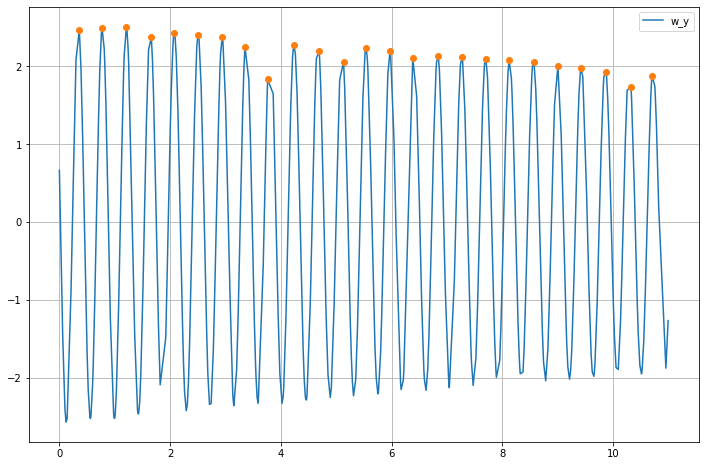

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(t, w_y, label='w_y')
plt.plot(t_peaks, w_y_peaks, '.', markersize=12)
plt.legend()
plt.grid()

In [23]:
print(f'time differences: {t_diff}\n')
print(f'period estimate (i.e., mean time difference): T = {T:.4f}')

time differences: [0.41 0.44 0.45 0.41 0.43 0.44 0.41 0.41 0.47 0.46 0.44 0.4  0.44 0.41
 0.46 0.43 0.43 0.42 0.44 0.44 0.41 0.46 0.45 0.38]

period estimate (i.e., mean time difference): T = 0.4308


In [24]:
J_y = 0.00002122075

In [29]:
r = 0.02

In [64]:
data = resample('some_data.json',
                t_min_offset=5.,
                t_max_offset=10.)

In [65]:
t = data['time']
w_x = np.deg2rad(data['gyro.x'])
w_y = np.deg2rad(data['gyro.y'])
w_z = np.deg2rad(data['gyro.z'])

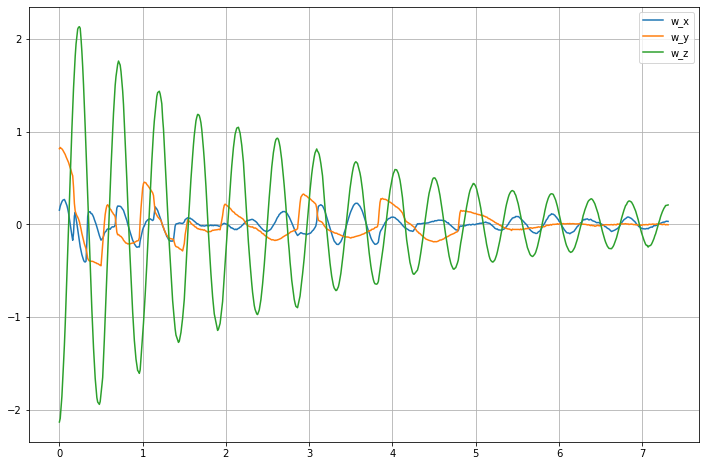

In [66]:
plt.figure(figsize=(12, 8))
plt.plot(t, w_x, label='w_x')
plt.plot(t, w_y, label='w_y')
plt.plot(t, w_z, label='w_z')
plt.legend()
plt.grid()

In [67]:
# Find the index of each peak (increase "prominence" if you get bad results)
peaks = find_peaks(w_z, prominence=0)
i_peaks = peaks[0]

# Find the time at each peak
t_peaks = t[i_peaks]

# Find w_x at each peak (for visualization)
w_z_peaks = w_z[i_peaks]

# Find the difference between consecutive peak times
#
# Note:
#
#  t_peaks[1:] means t_peaks without the first element
#  t_peaks[:-1] means t_peaks without the last element
#
# So, t_peaks[1:] - t_peaks[:-1] produces the following array:
#
#  [t_peaks[1]-t_peaks[0], t_peaks[0]-t_peaks[1], ...]
#
t_diff = t_peaks[1:] - t_peaks[:-1]

# Find the mean difference as an estimate of the oscillation period
T = np.mean(t_diff)

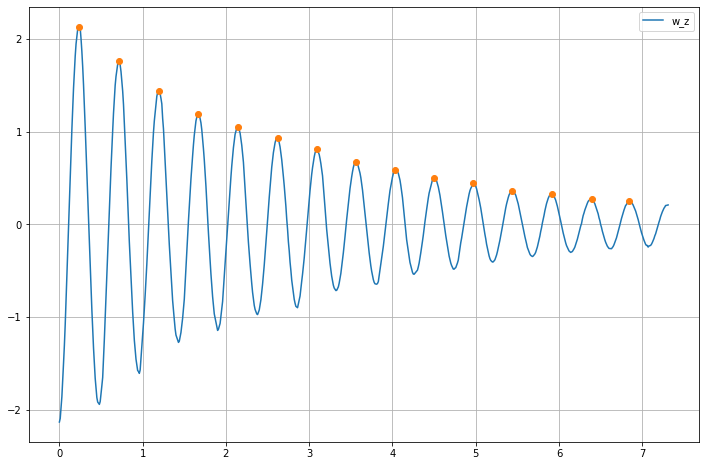

In [69]:
plt.figure(figsize=(12, 8))
plt.plot(t, w_z, label='w_z')
plt.plot(t_peaks, w_z_peaks, '.', markersize=12)
plt.legend()
plt.grid()

In [70]:
print(f'time differences: {t_diff}\n')
print(f'period estimate (i.e., mean time difference): T = {T:.4f}')

time differences: [0.47 0.49 0.46 0.49 0.47 0.47 0.47 0.47 0.47 0.47 0.47 0.47 0.48 0.45]

period estimate (i.e., mean time difference): T = 0.4714


In [71]:
J_z = 0.000030112233

In [72]:
print(f'm = {m:.2} kg')
print(f'J_x = {J_x:.2e} kg m^2')
print(f'J_y = {J_y:.2e} kg m^2')
print(f'J_z = {J_z:.2e} kg m^2')

m = 0.043 kg
J_x = 2.08e-05 kg m^2
J_y = 2.12e-05 kg m^2
J_z = 3.01e-05 kg m^2
